## MS-2 Acquire and Understand the Data

### Import Libraries

In [33]:
import itertools
import math
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [3]:
# Access the data that you will be using for the final project by downloading, collecting, or scraping* from the relevant source(s).
# Load the data into a Jupyter notebook
df = pd.read_csv(r"C:\Users\seoye\Desktop\Harvard\COMPSCI 1090A\Project\cell2celltrain.csv")
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,...,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,...,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,...,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,...,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,...,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,...,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


# Data Missingness

In [4]:
# examine data
df.shape

(51047, 58)

In [5]:
df.isna().sum(axis=0)

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

#### Deleting Missing Data

In [6]:
# Do some rows have more than a single missing value?
df[df.isna().sum(axis=1) > 1]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,...,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
62,3000410,Yes,90.25,952.0,50.0,0.00,161.0,0.0,308.0,51.2,11.7,1.3,47.3,0.0,0.0,464.2,8.3,7.3,300.0,95.0,13.0,0.0,10.3,54,1,...,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,0,No,0,30,No,6-VeryLow,Other,Other,Unknown
87,3000598,No,122.00,1806.0,75.0,15.59,146.0,1.0,-156.0,-32.8,5.0,14.0,62.7,2.0,0.7,409.9,50.0,13.0,290.3,147.7,19.0,0.0,14.7,49,2,...,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,0,No,0,30,No,6-VeryLow,Suburban,Other,Unknown
91,3000626,No,96.04,545.0,60.0,0.66,111.0,1.1,NaN,NaN,3.3,0.0,21.0,0.0,0.0,38.2,12.0,1.3,52.3,40.0,3.3,0.0,0.7,53,2,...,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,60,No,1-Highest,Town,Other,Unknown
122,3000898,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,2,...,Yes,No,No,No,Known,No,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,0,30,No,1-Highest,Other,Other,No
126,3000926,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,1,...,No,No,No,No,Unknown,Yes,Yes,No,No,No,No,0,0,No,Yes,0,1,No,0,30,No,1-Highest,Town,Other,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.0,0.3,30,1,...,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,...,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,...,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,...,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


Some of these data seems to be useful. Let's examine the rows with two or more missing values

In [7]:
# Do some rows have more than two missing values?
df[df.isna().sum(axis=1) > 2]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,...,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
122,3000898,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,2,...,Yes,No,No,No,Known,No,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,0,30,No,1-Highest,Other,Other,No
126,3000926,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,1,...,No,No,No,No,Unknown,Yes,Yes,No,No,No,No,0,0,No,Yes,0,1,No,0,30,No,1-Highest,Town,Other,Unknown
925,3007326,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,2,...,No,Yes,Yes,No,Known,No,No,No,No,No,Yes,0,0,No,Yes,0,4,No,0,60,No,3-Good,Other,Self,Yes
1454,3011438,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,3,...,No,No,Yes,No,Known,No,No,No,No,No,No,0,0,Yes,No,0,5,No,1,30,No,1-Highest,Other,Other,Yes
2228,3017394,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,2,...,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,5-Low,Suburban,Other,Yes
2322,3018142,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,2,...,No,No,No,No,Unknown,No,No,No,No,No,No,1,0,No,No,0,0,No,0,Unknown,Yes,1-Highest,Suburban,Other,Unknown
2402,3018778,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,3,...,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,Yes,0,6,No,0,30,No,1-Highest,Other,Other,No
2707,3021202,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,3,...,No,No,Yes,Yes,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,Unknown,No,3-Good,Suburban,Other,Yes
3920,3030610,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,2,...,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,7,No,1,Unknown,No,5-Low,Other,Professional,Yes
4139,3032378,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,2,...,No,No,No,No,Known,No,No,No,No,No,Yes,0,0,Yes,No,0,4,No,0,30,No,5-Low,Other,Other,No


In [8]:
# Yuck! These are useless. Drop these rows
df = df[df.isna().sum(axis=1) <= 2]

In [9]:
df.isna().sum(axis=0)

CustomerID                     0
Churn                          0
MonthlyRevenue                 0
MonthlyMinutes                 0
TotalRecurringCharge           0
DirectorAssistedCalls          0
OverageMinutes                 0
RoamingCalls                   0
PercChangeMinutes            209
PercChangeRevenues           209
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       0
HandsetModels                  0
CurrentEquipmentDays           0
AgeHH1    

In [21]:
# 24 missing service area could be dropped as it is very minimal size compared to the overall dataset 
df = df[df['ServiceArea'].notna()]

### Impute Missing Data

<Axes: >

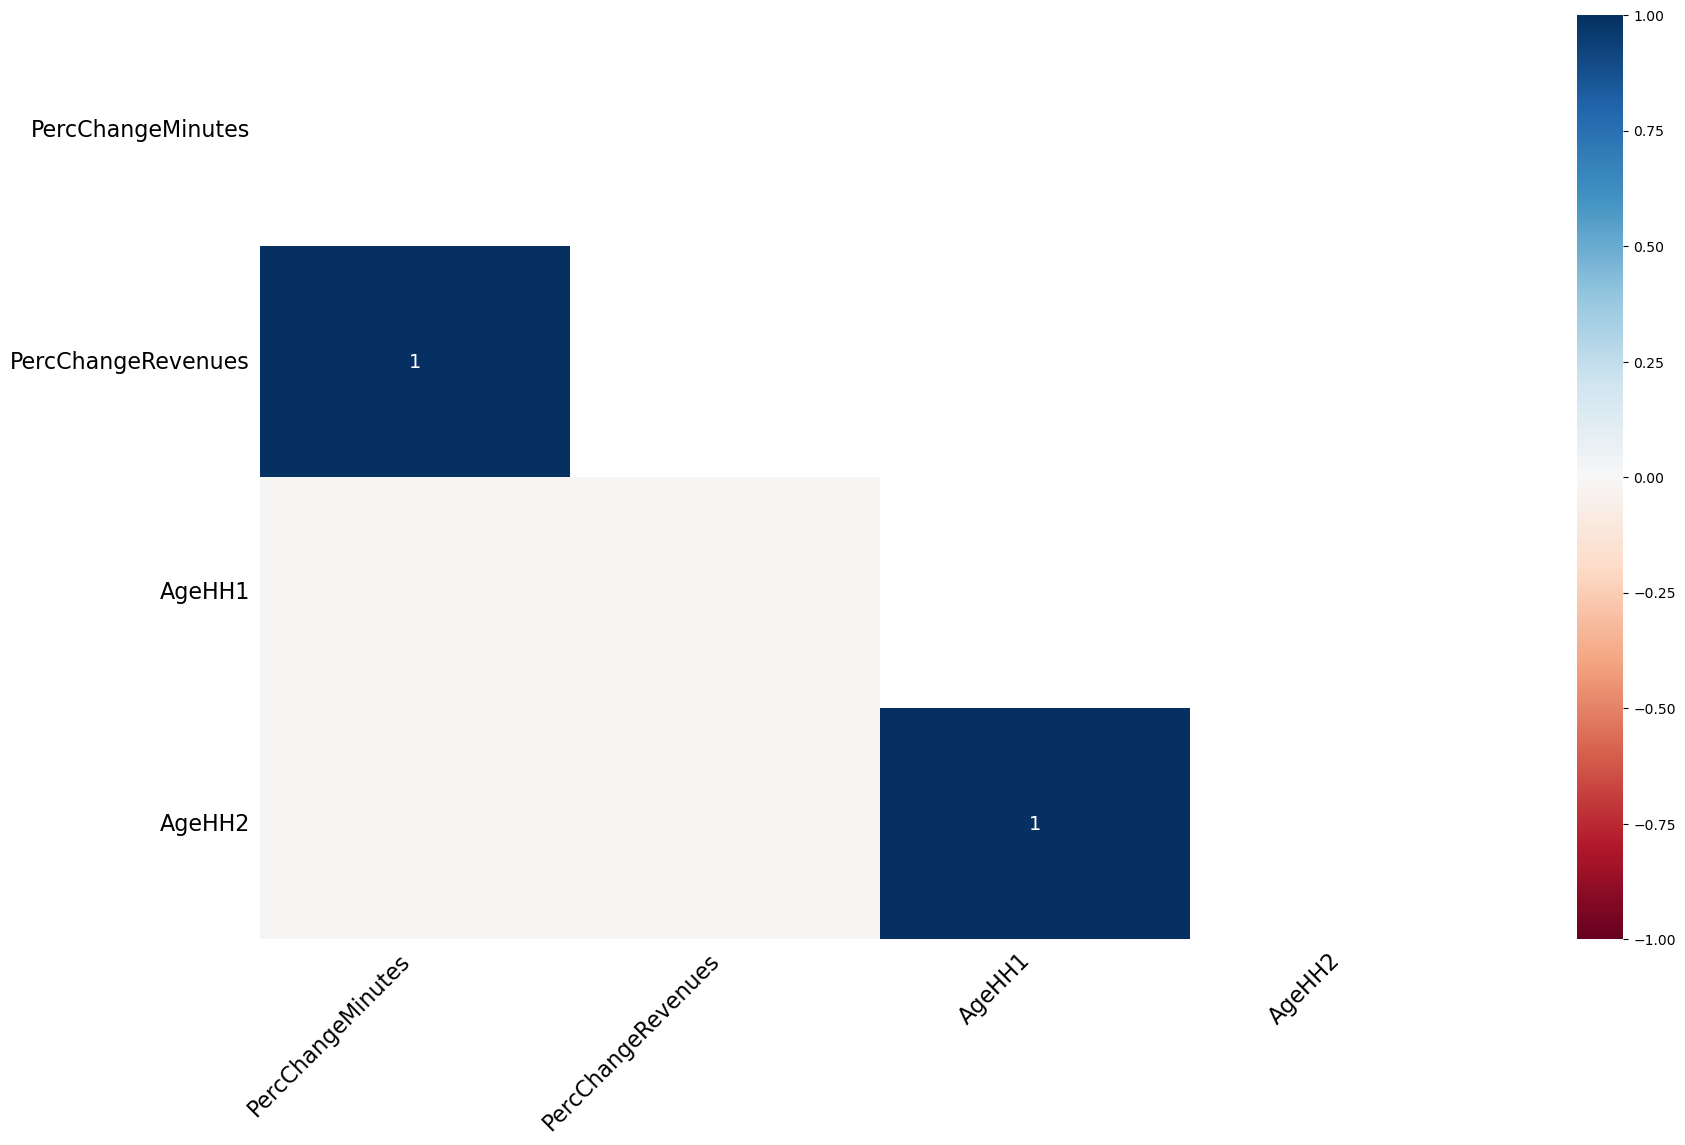

In [10]:
# check if there is any correlation between the absence of one variable with the presence of another
msno.heatmap(df.sample(500))

In [20]:
# New users should have percent change in revenue and minutes as 0
# Set 'PercChangeRevenues' and 'PercChangeMinutes' to 0 for users with 'NewCellphoneUser' == "Yes"
df.loc[df['NewCellphoneUser'] == "Yes", ['PercChangeRevenues', 'PercChangeMinutes']] = 0

df.isna().sum(axis=0)

CustomerID                     0
Churn                          0
MonthlyRevenue                 0
MonthlyMinutes                 0
TotalRecurringCharge           0
DirectorAssistedCalls          0
OverageMinutes                 0
RoamingCalls                   0
PercChangeMinutes            188
PercChangeRevenues           188
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                    0
Handsets                       0
HandsetModels                  0
CurrentEquipmentDays           0
AgeHH1    

In [31]:
df_imputed = df.copy() 
# Replace "Yes"/"No" with binary values
df_imputed.replace({'Yes': 1, 'No': 0}, inplace=True)
# Drop all categorical variables
df_imputed = df_imputed.select_dtypes(exclude=['object'])
# Columns with missing values to impute
columns_to_impute = ['PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2']

# Loop through each column and fit a Linear Regression model to predict the missing values
for column in columns_to_impute:
    # Separate rows with and without missing values in the target column
    df_known = df_imputed[df_imputed[column].notna()]
    df_missing = df_imputed[df_imputed[column].isna()]

    # Select features for the model
    features = df_imputed.columns.difference([column])
    
    # Define training data and replace NaNs with 0
    X_known = df_known[features].fillna(0)  # Replace NaNs with 0 in features for now
    y_known = df_known[column].fillna(0)    # Replace NaNs with 0 in target for now
    
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_known, y_known)
    
    # Predict missing values for this column
    X_missing = df_missing[features].fillna(0)  # Replace NaNs with 0 in missing data
    df_imputed.loc[df_imputed[column].isna(), column] = model.predict(X_missing)

# check
df_imputed.isna().sum(axis=0)

C:\Users\seoye\AppData\Local\Temp\ipykernel_21748\222424420.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_imputed.replace({'Yes': 1, 'No': 0}, inplace=True)


CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

# Data Imbalance

Class distribution:
 Churn
0    36236
1    14628
Name: count, dtype: int64


C:\Users\seoye\AppData\Local\Temp\ipykernel_21748\696272711.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


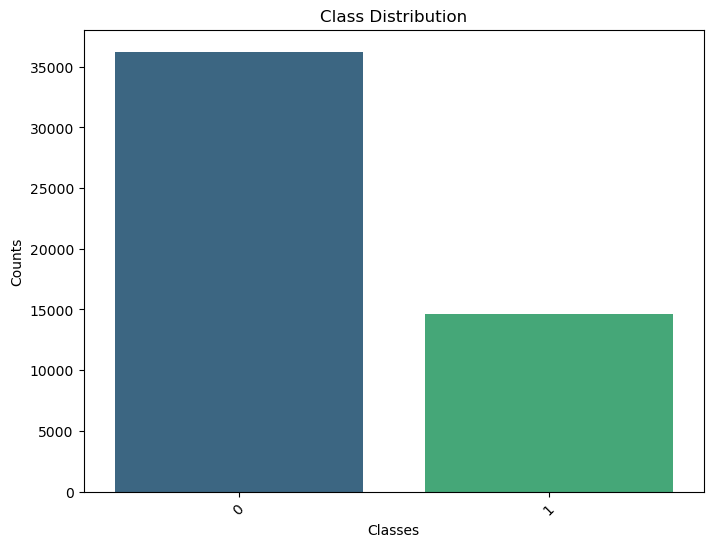

In [32]:
# explore if there is data imbalance
target_column = 'Churn'

# Count the occurrences of each class
class_counts = df_imputed[target_column].value_counts()

# Print the counts
print("Class distribution:\n", class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

# Data Scaling

In [39]:
df = df_imputed.copy()  # Replace df_imputed with df

features_to_scale = df.select_dtypes(include=[np.number]).columns.tolist()

original_ranges = df[features_to_scale].max() - df[features_to_scale].min()
original_std = df[features_to_scale].std()

standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[features_to_scale] = standard_scaler.fit_transform(df[features_to_scale])

standardized_ranges = df_standardized[features_to_scale].max() - df_standardized[features_to_scale].min()
standardized_std = df_standardized[features_to_scale].std()

minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

normalized_ranges = df_normalized[features_to_scale].max() - df_normalized[features_to_scale].min()
normalized_std = df_normalized[features_to_scale].std()

# Create a DataFrame to compare original and scaled ranges/standard deviations
scaling_comparison = pd.DataFrame({
    'Original Range': original_ranges,
    'Standardized Range': standardized_ranges,
    'Normalized Range': normalized_ranges,
    'Original Std': original_std,
    'Standardized Std': standardized_std,
    'Normalized Std': normalized_std
})

# Calculate the difference or ratio
scaling_comparison['Range Change (Std)'] = scaling_comparison['Standardized Range'] - scaling_comparison['Original Range']
scaling_comparison['Range Change (MinMax)'] = scaling_comparison['Normalized Range'] - scaling_comparison['Original Range']

scaling_comparison_sorted = scaling_comparison.sort_values(by='Range Change (Std)', ascending=False)

# Print the comparison DataFrame sorted by the most scaled features
styled_df = scaling_comparison_sorted.style.format({
    'Original Range': '{:.2f}',
    'Standardized Range': '{:.2f}',
    'Normalized Range': '{:.2f}',
    'Original Std': '{:.2f}',
    'Standardized Std': '{:.2f}',
    'Normalized Std': '{:.2f}',
    'Range Change (Std)': '{:.2f}',
    'Range Change (MinMax)': '{:.2f}'
}).set_table_attributes('style="width: 100%; text-align: left;"')

styled_df

,Original Range,Standardized Range,Normalized Range,Original Std,Standardized Std,Normalized Std,Range Change (Std),Range Change (MinMax)
ReferralsMadeBySubscriber,35.00,113.61,1.00,0.31,1.00,0.01,78.61,-34.00
CallForwardingCalls,81.30,136.59,1.00,0.60,1.00,0.01,55.29,-80.30
AdjustmentsToCreditRating,25.00,65.41,1.00,0.38,1.00,0.02,40.41,-24.00
ActiveSubs,53.00,78.48,1.00,0.68,1.00,0.01,25.48,-52.00
RetentionOffersAccepted,3.00,21.08,1.00,0.14,1.00,0.05,18.08,-2.00
RetentionCalls,4.00,19.44,1.00,0.21,1.00,0.05,15.44,-3.00
OwnsMotorcycle,1.00,8.73,1.00,0.11,1.00,0.11,7.73,0.00
OptOutMailings,1.00,8.30,1.00,0.12,1.00,0.12,7.30,0.00
MadeCallToRetentionTeam,1.00,5.52,1.00,0.18,1.00,0.18,4.52,0.00
NonUSTravel,1.00,4.33,1.00,0.23,1.00,0.23,3.33,0.00
